In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn.preprocessing as sp
from scipy import stats

In [3]:
Dataset_raw = pd.read_csv('Final_Data.csv')

In [4]:
Dataset_df = Dataset_raw[['Tin','FR','T1','T2','Qcool','RR','B','QR','Qc','FV','FL_Top','FL_Bot','T5','T10','T15','T20','T25','XME_V','XME_D','XW_B']]

In [5]:
Dataset_df

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
0,230.3,5.01,46.9,47.3,-3408.57514,1.37,99.750,1983.48465,-2488.67285,1.138522,98.280150,64.914011,66.257027,69.541474,75.486573,76.672814,87.675879,0.494652,0.995920,0.993144
1,230.1,4.99,47.1,47.1,-3361.39142,1.35,99.780,1915.60558,-2468.84306,1.115023,98.296869,64.923862,66.300389,69.675587,75.673650,76.848653,87.632430,0.490251,0.995804,0.992883
2,230.2,4.96,47.0,47.3,-3381.69240,1.32,99.750,1904.54513,-2435.46282,1.142253,98.255017,64.936598,66.353072,69.789407,75.703274,76.876799,87.627191,0.494556,0.995726,0.992843
3,230.1,4.96,46.9,47.2,-3386.32257,1.34,99.750,1931.66436,-2457.12858,1.138654,98.259095,64.926414,66.312165,69.688798,75.625758,76.797898,87.520617,0.492412,0.995789,0.992799
4,230.1,4.96,47.0,47.0,-3373.49223,1.32,99.750,1897.66426,-2437.68179,1.116335,98.291160,64.936477,66.353103,69.794478,75.723243,76.896943,87.658595,0.488026,0.995669,0.992860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,238.7,4.66,57.0,43.5,-2778.68173,2.57,101.975,2466.88934,-3715.32348,0.543364,96.821734,64.859134,65.779825,67.830652,74.295629,75.245604,80.543126,0.417377,0.996010,0.973971
15933,238.4,4.69,57.3,43.8,-2733.54212,2.59,101.950,2443.71320,-3737.10741,0.545191,96.911121,64.859891,65.779871,67.832493,74.344810,75.296630,80.659625,0.423115,0.996075,0.974561
15934,238.7,4.66,57.4,44.2,-2741.43180,2.60,101.930,2457.44303,-3746.68840,0.564553,96.964680,64.859930,65.779101,67.825150,74.321131,75.275515,80.697085,0.430865,0.996145,0.974983
15935,239.1,4.65,57.9,44.2,-2719.76161,2.56,101.955,2386.51443,-3701.16486,0.549742,96.874197,64.860486,65.784184,67.867261,74.457235,75.406400,80.734354,0.430865,0.996151,0.974436


In [6]:
Dataset_raw = np.array(Dataset_df)
Dataset = np.random.permutation(Dataset_raw)

X_train = Dataset[:12000,:9]
Y_train = Dataset[:12000,-3:]
X_test  = Dataset[12000:,:9]
Y_test  = Dataset[12000:,-3:]

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)
scaler_X_test = sp.StandardScaler().fit(X_test)
X_test_scl = scaler_X_test.transform(X_test)
scaler_Y_train = sp.StandardScaler().fit(Y_train)
Y_train_scl = scaler_Y_train.transform(Y_train)
scaler_Y_test = sp.StandardScaler().fit(Y_test)
Y_test_scl = scaler_Y_test.transform(Y_test)

In [7]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 9) ,
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 3                        )
        ])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = 'mse',
              metrics = ['accuracy','mse'])
model.summary()
history = model.fit(X_train_scl , Y_train_scl , epochs = 300 , batch_size = 1000 , validation_split = 0.2 , verbose = 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 1,299
Trainable params: 1,299
Non-trainable params: 0
______________________________________________________

In [8]:
score = model.evaluate(X_test_scl , Y_test_scl , batch_size = 1000 , verbose = 0)
print('score:',score)
print('Accuracy:',score[1]*100,'%')

score: [0.021867385264206937, 0.991872, 0.021867385]
Accuracy: 99.18720126152039 %


In [9]:
Y_predict_scl = model.predict(X_test_scl)
Y_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_

(0.0, 1.0)

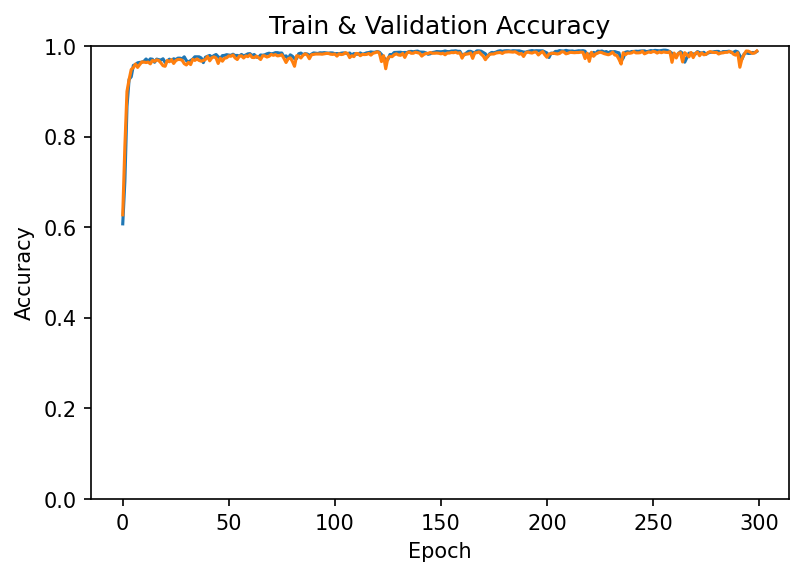

In [10]:
plt.figure(dpi = 150)
plt.title('Train & Validation Accuracy')
plt.plot(history.history['accuracy'],label = 'Train_Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
#plt.savefig('Accuracy.png', dpi = 150)

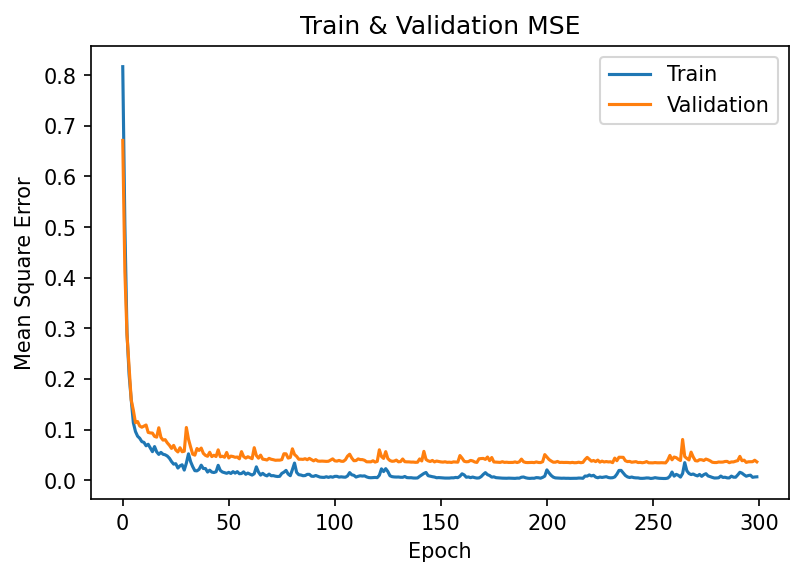

In [11]:
plt.figure(dpi = 150)
plt.title('Train & Validation MSE')
plt.plot(history.history['mse'],label = 'Train')
plt.plot(history.history['val_mse'],label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
#plt.savefig('MSE', dpi = 150)

R_Pearson =  0.9996046163761557


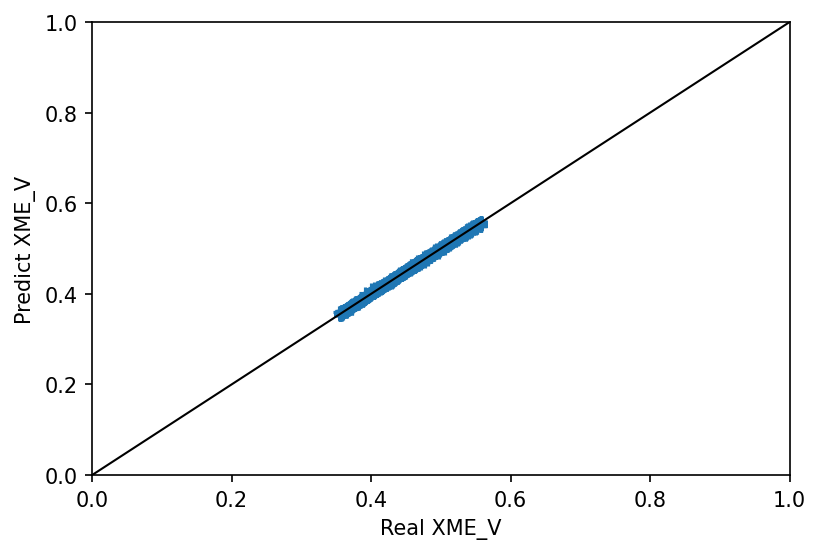

In [12]:
Y_test_reshape = np.reshape(Y_test[:,0],(3937,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(3937,))

plt.figure(dpi = 150)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.scatter(Y_test[:,0],Y_predict[:,0],marker = '+')
plt.plot([0,1],[0,1],'black',linewidth = 1)
plt.xlabel('Real XME_V')
plt.ylabel('Predict XME_V')
plt.savefig('XME_V.png', dpi = 150)

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

R_Pearson =  0.9996046163761557


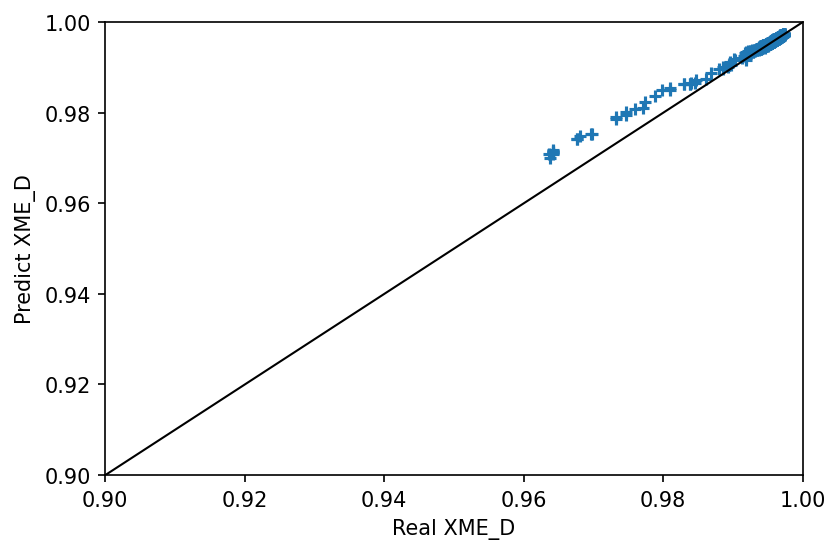

In [13]:
Y_test_reshape = np.reshape(Y_test[:,0],(3937,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(3937,))

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

plt.figure(dpi = 150)
plt.xlim(0.9,1)
plt.ylim(0.9,1)
plt.scatter(Y_test[:,1],Y_predict[:,1],marker = '+')
plt.plot([0.9,1],[0.9,1],'black',linewidth = 1)
plt.xlabel('Real XME_D')
plt.ylabel('Predict XME_D')
plt.savefig('XME_D.png', dpi = 150)

R_Pearson =  0.9996046163761557


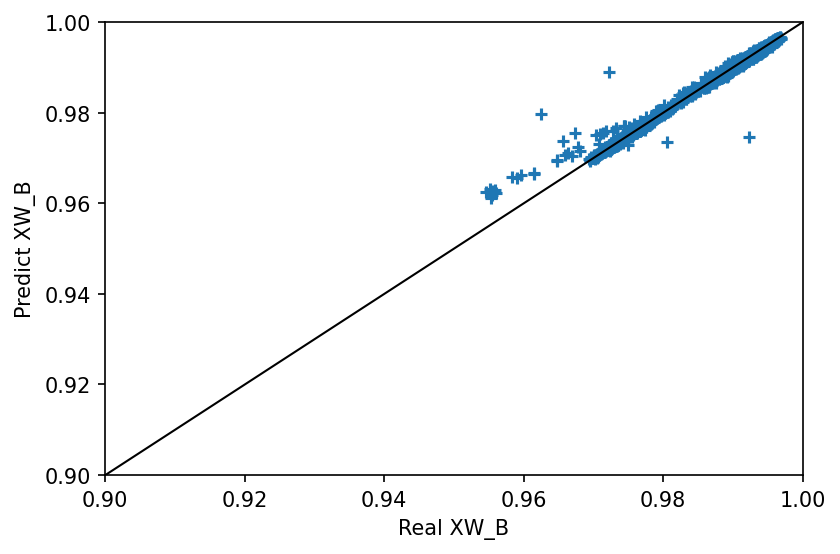

In [14]:
Y_test_reshape = np.reshape(Y_test[:,0],(3937,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(3937,))

plt.figure(dpi = 150)
plt.xlim(0.9,1)
plt.ylim(0.9,1)
plt.scatter(Y_test[:,2],Y_predict[:,2],marker = '+')
plt.plot([0.9,1],[0.9,1],'black',linewidth = 1)
plt.xlabel('Real XW_B')
plt.ylabel('Predict XW_B')
plt.savefig('XW_B.png', dpi = 150)

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

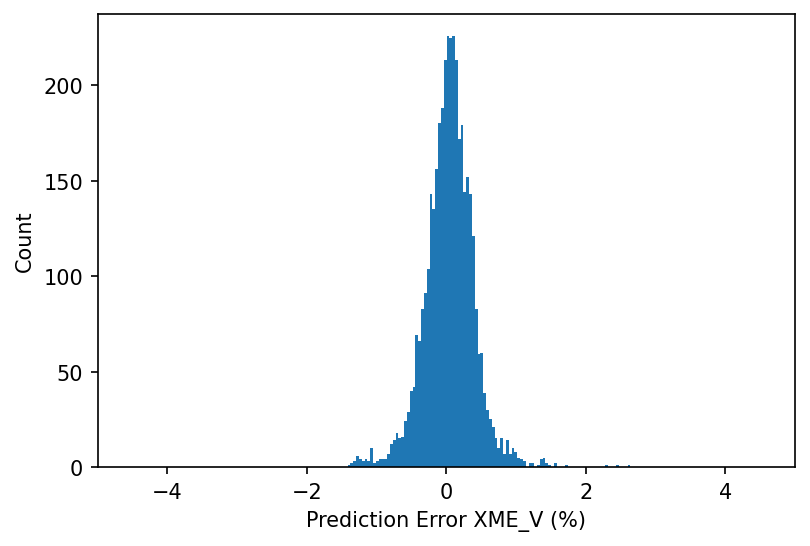

In [15]:
axis = 5
error = ((Y_predict[:,0] - Y_test[:,0]) / (Y_test[:,0])) * 100
plt.figure(dpi = 150)
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error XME_V (%)")
plt.ylabel("Count")
plt.xlim(-axis,axis)
plt.savefig('Error XME_V.png', dpi = 150)

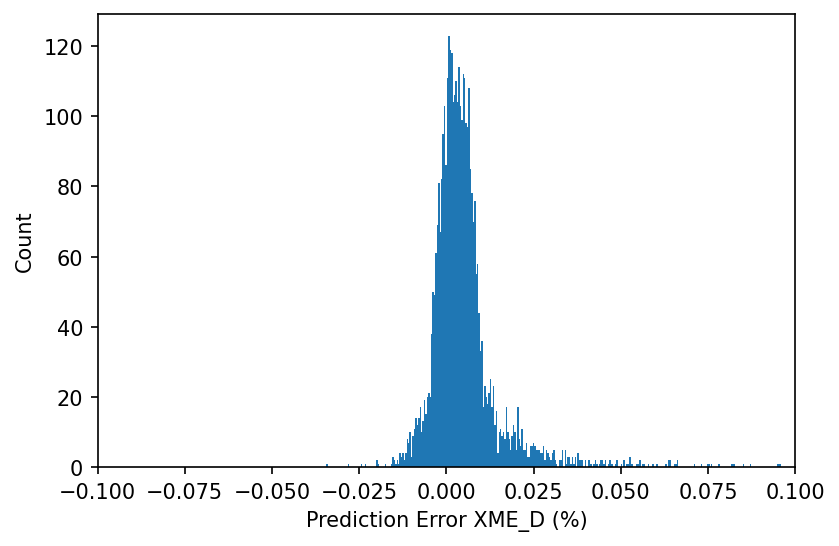

In [16]:
axis = 0.1
error = ((Y_predict[:,1] - Y_test[:,1]) / (Y_test[:,1])) * 100
plt.figure(dpi = 150)
plt.hist(error , bins = 2000)
plt.xlabel("Prediction Error XME_D (%)")
plt.ylabel("Count")
plt.xlim(-axis,axis)
plt.savefig('Error XME_D.png', dpi = 150)

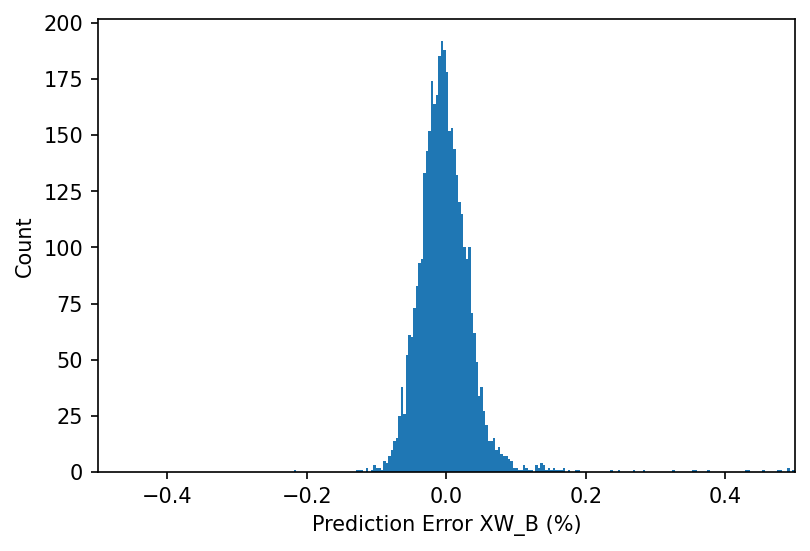

In [17]:
axis = 0.5
error = ((Y_predict[:,2] - Y_test[:,2]) / (Y_test[:,2])) * 100
plt.figure(dpi = 150)
plt.hist(error , bins = 1000)
plt.xlabel("Prediction Error XW_B (%)")
plt.ylabel("Count")
plt.xlim(-axis,axis)
plt.savefig('Error XW_B.png', dpi = 150)

In [18]:
for i in range(12000):
    if Y_train[i,1] >= 0.99:
        if i == 0:
            X_true = X_train[i,:]
            Y_true = Y_train[i,:]
        else:
            X_true = np.vstack((X_true,X_train[i,:]))
            Y_true = np.vstack((Y_true,Y_train[i,:]))

In [19]:
X_False = Dataset_raw[6920,:9]
Y_False = Dataset_raw[6920,-3:]
print(Y_False)

[0.43983068 0.96765762 0.95837382]


In [20]:
def Error(item):
    err = (X_true[i,item] - X_False[item]) / X_False[item]
    return err

Target = np.zeros((1,9))
score = np.zeros((len(X_true),1))

for i in range(len(X_true)):
    FR = Error(1)
    RR = Error(5)
    B  = Error(6)
    QR = Error(7)
    score[i,0] = (abs(1/FR)*0.131695) + (abs(1/RR)*0.304498) + (abs(1/B)*0.159337) + (abs(1/QR)*0.225232)
    
    if X_true[i,5] == X_False[5]:    #RR一樣
        X_Target = X_true[i,:]
        Y_Target = Y_true[i,:]
        score[i,0] = 0
    elif X_true[i,7] == X_False[7]:  #QR一樣
        X_Target = X_true[i,:]
        Y_Target = Y_true[i,:]
        score[i,0] = 0
    elif X_true[i,6] == X_False[6]:  #B一樣
        X_Target = X_true[i,:]
        Y_Target = Y_true[i,:]
        score[i,0] = 0
    elif X_true[i,1] == X_False[1]:  #FRㄧ樣
        X_Target = X_true[i,:]
        Y_Target = Y_true[i,:]
        score[i,0] = 0
    else:
        X_Target = X_true[np.argmax(score),:]
        Y_Target = Y_true[np.argmax(score),:]

/Users/shawn/opt/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [21]:
print('        ' + 'Current' + '      ' + 'Target')
print('Tin' + '     ' + str(X_False[0]) + '        ' + str(X_Target[0]))
print('FR' + '      ' + str(X_False[1]) + '         ' + str(X_Target[1]))
print('T1' + '      ' + str(X_False[2]) + '         ' + str(X_Target[2]))
print('T2' + '      ' + str(X_False[3]) + '         ' + str(X_Target[3]))
print('Qcool' + '   ' + str(round(X_False[4],2)) + '     ' + str(round(X_Target[4],2)))
print('RR' + '      ' + str(X_False[5]) + '         ' + str(X_Target[5]))
print('B' + '       ' + str(X_False[6]) + '       ' + str(X_Target[6]))
print('QR' + '      ' + str(round(X_False[7],2)) + '      ' + str(round(X_Target[7],2)))
print('Qc' + '      ' + str(round(X_False[8],2)) + '     ' + str(round(X_Target[8],2)))
print('----------------------------------')
print('XME_V' + '   ' + str(round(Y_False[0],3)) + '         ' + str(round(Y_Target[0],3)))
print('XME_D' + '   ' + str(round(Y_False[1],3)) + '         ' + str(round(Y_Target[1],3)))
print('XW_B ' + '   ' + str(round(Y_False[2],3)) + '         ' + str(round(Y_Target[2],3)))

        Current      Target
Tin     244.2        237.9
FR      4.92         4.91
T1      48.0         50.7
T2      45.3         48.0
Qcool   -3900.99     -3494.21
RR      0.72         1.9
B       100.48       100.475
QR      1696.27      2550.88
Qc      -1810.95     -3024.61
----------------------------------
XME_V   0.44         0.511
XME_D   0.968         0.997
XW_B    0.958         0.987


In [22]:
def Predict():
    global X_train
    X_train = np.vstack([X_train,X_Try])
    scaler_X_train = sp.StandardScaler().fit(X_train)
    X_train_scl = scaler_X_train.transform(X_train)
    Y_predict_scl = model.predict(X_train_scl)
    Y_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_
    X_rec = X_train[-1,:]
    Y_rec = Y_predict[-1,:]
    return X_rec , Y_rec

In [23]:
X_Try = X_False
for j in [5,7,6,1]:
    for i in range(11):
        X_Try[j] = X_False[j] + (X_Target[j] - X_False[j]) * 0.1 * i
        ans = Predict()
        X_rec = ans[0]
        Y_rec = ans[1]
        XME_D = Y_rec[1]
        XME_D = XME_D.astype(float)
        print(i,j)
        print(X_False)
        print(X_rec)
        print(X_Target)
        print('----------------')
        print(Y_False[1])
        print(XME_D)
        print(Y_Target[1])
        if XME_D >= 0.99:
            break
        else:
            continue
    if XME_D >= 0.99:
        break
    else:
        continue

0 5
[ 2.44200000e+02  4.92000000e+00  4.80000000e+01  4.53000000e+01
 -3.90099174e+03  7.20000000e-01  1.00480000e+02  1.69627465e+03
 -1.81095356e+03]
[ 2.44200000e+02  4.92000000e+00  4.80000000e+01  4.53000000e+01
 -3.90099174e+03  7.20000000e-01  1.00480000e+02  1.69627465e+03
 -1.81095356e+03]
[ 2.37900000e+02  4.91000000e+00  5.07000000e+01  4.80000000e+01
 -3.49421384e+03  1.90000000e+00  1.00475000e+02  2.55087589e+03
 -3.02460755e+03]
----------------
0.967657623
0.970015083402713
0.9966993209999999
1 5
[ 2.44200000e+02  4.92000000e+00  4.80000000e+01  4.53000000e+01
 -3.90099174e+03  8.38000000e-01  1.00480000e+02  1.69627465e+03
 -1.81095356e+03]
[ 2.44200000e+02  4.92000000e+00  4.80000000e+01  4.53000000e+01
 -3.90099174e+03  8.38000000e-01  1.00480000e+02  1.69627465e+03
 -1.81095356e+03]
[ 2.37900000e+02  4.91000000e+00  5.07000000e+01  4.80000000e+01
 -3.49421384e+03  1.90000000e+00  1.00475000e+02  2.55087589e+03
 -3.02460755e+03]
----------------
0.967657623
0.9785835

In [24]:
'''
Tin = input('Tin = ')
FR = input('FR = ')
T1 = input('T1 = ')
T2 = input('T2 = ')
Qcool = input('Qcool = ')
RR = input('RR = ')
B = input('B = ')
QR = input('QR')
Qc = input('Qc')
X_real = np.array([Tin , FR , T1 , T2 , Qcool , RR , B , QR , Qc])
X_train = np.vstack([X_train,X_real])

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)

Y_predict_scl = model.predict(X_train_scl)
Y_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_

X_real = X_train[-1,:]
Y_real = Y_predict[-1,:]
print(X_real)
print(Y_real)
'''

"\nTin = input('Tin = ')\nFR = input('FR = ')\nT1 = input('T1 = ')\nT2 = input('T2 = ')\nQcool = input('Qcool = ')\nRR = input('RR = ')\nB = input('B = ')\nQR = input('QR')\nQc = input('Qc')\nX_real = np.array([Tin , FR , T1 , T2 , Qcool , RR , B , QR , Qc])\nX_train = np.vstack([X_train,X_real])\n\nscaler_X_train = sp.StandardScaler().fit(X_train)\nX_train_scl = scaler_X_train.transform(X_train)\n\nY_predict_scl = model.predict(X_train_scl)\nY_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_\n\nX_real = X_train[-1,:]\nY_real = Y_predict[-1,:]\nprint(X_real)\nprint(Y_real)\n"